<a href="https://colab.research.google.com/github/sushmita-2002/Sentiment-Analysis-Model/blob/main/FeedbackSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
#Mounting Google drive to access datasets without uploading it for each session

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path1='/content/drive/My Drive/amazon_reviewDataset/Train_final.csv'
df=pd.read_csv(file_path1)
df.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label
0,en_0038023,product_en_0449126,reviewer_en_0834231,5,Very bright. Very good for my bathroom!,Bright!,other,Positive
1,en_0965034,product_en_0327562,reviewer_en_0811802,4,Great cushion. Little small pieces of nylon co...,Cushion,office_product,Positive
2,en_0508085,product_en_0672133,reviewer_en_0677525,2,The lights are great but the sea creatures los...,It’s just okay,home,Negative
3,en_0787691,product_en_0225769,reviewer_en_0483050,3,"If you're a big KA fan, I'm sure you'll love t...",It's ok,digital_ebook_purchase,Positive
4,en_0633243,product_en_0203059,reviewer_en_0767425,5,"Comfy, great quality",Love,home,Positive


In [ ]:
# Randomly shuffling the rows
df = df.sample(frac=1, random_state=42)  # Set a random_state for reproducibility

# Resetting the index if needed
df = df.reset_index(drop=True)

# Displaying the shuffled DataFrame
df.head(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative


## Visualisation

In [ ]:
df.columns

Index(['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body',
       'review_title', 'product_category', 'Sentiment Label'],
      dtype='object')

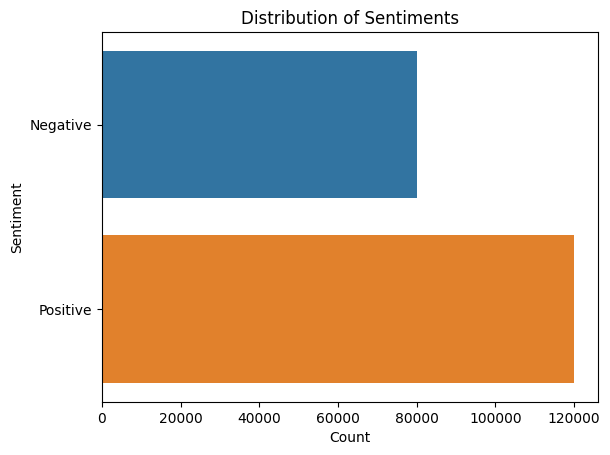

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
##sentiment distribution
sns.countplot(y=df['Sentiment Label'])
plt.title('Distribution of Sentiments')
plt.xlabel('Count')
plt.ylabel('Sentiment')
plt.show()

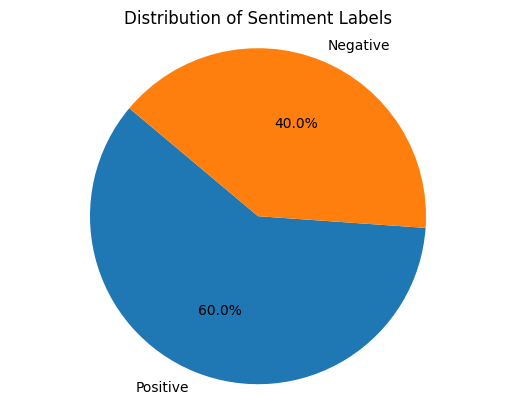

In [ ]:
sentiment_counts = [120000,80000]  # Replace with your actual counts

labels = ['Positive', 'Negative']

# Creating a pie chart
plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Sentiment Labels')
plt.show()

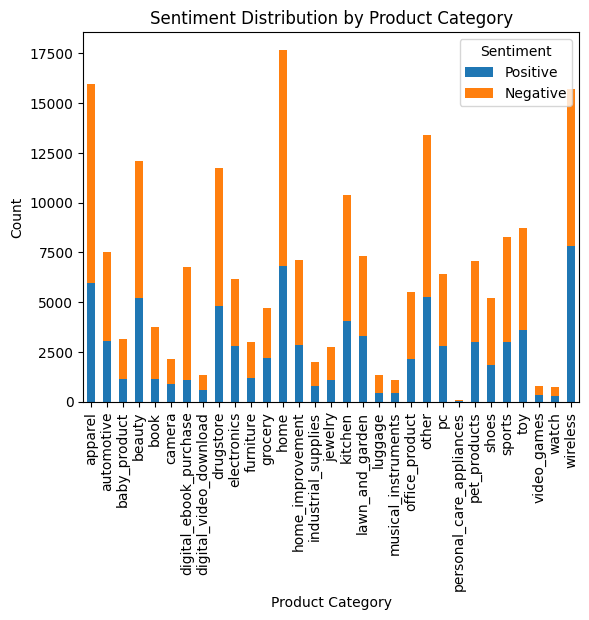

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by product_category and Sentiment Label, then count the occurrences
grouped = df.groupby(['product_category', 'Sentiment Label']).size().unstack(fill_value=0)

# Plot the histogram
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Product Category')
plt.legend(title='Sentiment', labels=['Positive', 'Negative', 'Neutral'])
plt.xticks(rotation=90)
plt.show()

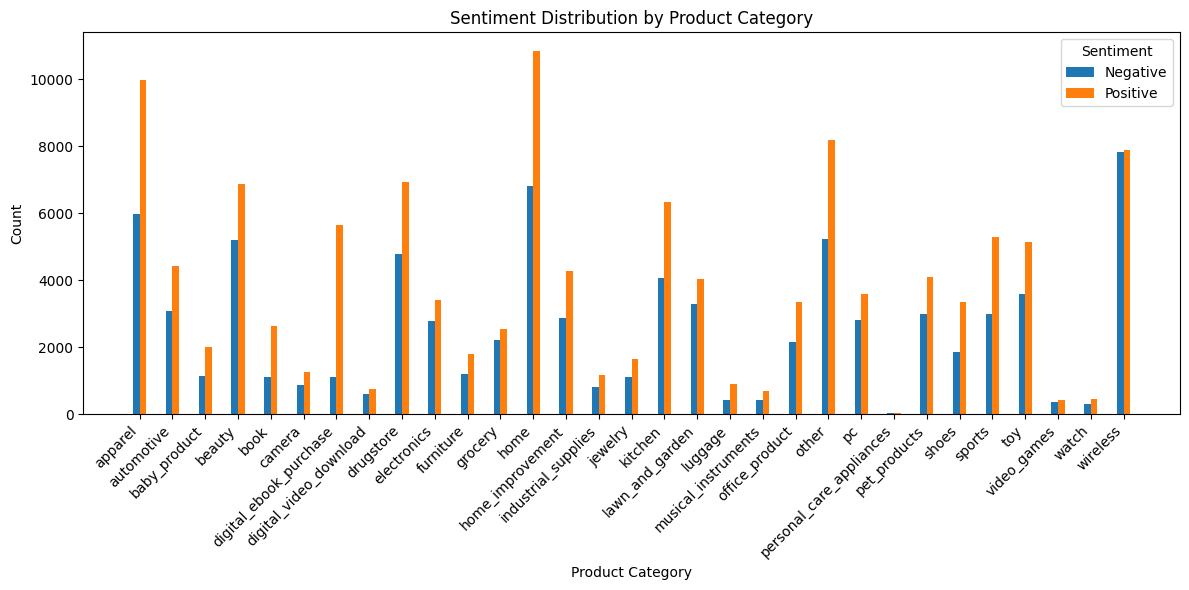

In [ ]:
import numpy as np
# Creating a pivot table to count the occurrences of each sentiment label for each category
pivot_table = pd.pivot_table(df, index='product_category', columns='Sentiment Label', aggfunc='size', fill_value=0)

# Setting the width of the bars
bar_width = 0.2

# Getting the list of product categories
categories = pivot_table.index

# Setting the positions for the bars
x = np.arange(len(categories))

# Creating subplots to display each sentiment label separately
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting each sentiment label as a side-by-side bar
for i, sentiment in enumerate(pivot_table.columns):
    ax.bar(x + i * bar_width, pivot_table[sentiment], width=bar_width, label=sentiment)

# Labelling the x-axis with product categories and rotate the labels for better visibility
ax.set_xticks(x + bar_width * (len(pivot_table.columns) - 1) / 2)
ax.set_xticklabels(categories, rotation=45, ha='right')

# Setting labels and legend
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Sentiment Distribution by Product Category')
plt.legend(title='Sentiment')

# Showing the plot
plt.tight_layout()  # Ensuring the labels fit within the plot area
plt.show()

In [ ]:
df['Sentiment Label'].value_counts()

Positive    120000
Negative     80000
Name: Sentiment Label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   review_id         200000 non-null  object
 1   product_id        200000 non-null  object
 2   reviewer_id       200000 non-null  object
 3   stars             200000 non-null  int64 
 4   review_body       200000 non-null  object
 5   review_title      199977 non-null  object
 6   product_category  200000 non-null  object
 7   Sentiment Label   200000 non-null  object
dtypes: int64(1), object(7)
memory usage: 12.2+ MB


In [ ]:
df.isnull().sum()

review_id            0
product_id           0
reviewer_id          0
stars                0
review_body          0
review_title        23
product_category     0
Sentiment Label      0
dtype: int64

In [ ]:
df['review_title'].fillna('Not Available', inplace=True)
df.isnull().sum()

review_id           0
product_id          0
reviewer_id         0
stars               0
review_body         0
review_title        0
product_category    0
Sentiment Label     0
dtype: int64

In [ ]:
df.count()

review_id           200000
product_id          200000
reviewer_id         200000
stars               200000
review_body         200000
review_title        200000
product_category    200000
Sentiment Label     200000
dtype: int64

In [ ]:
df['product_id'].nunique(),df['review_id'].nunique(),df['reviewer_id'].nunique()

(185541, 200000, 196745)

In [ ]:
import plotly.express as px

ratings = df["stars"].value_counts()
numbers = ratings.index
quantity = ratings.values
figure = px.pie(df, values=quantity, names=numbers,hole = 0.5)
figure.show()

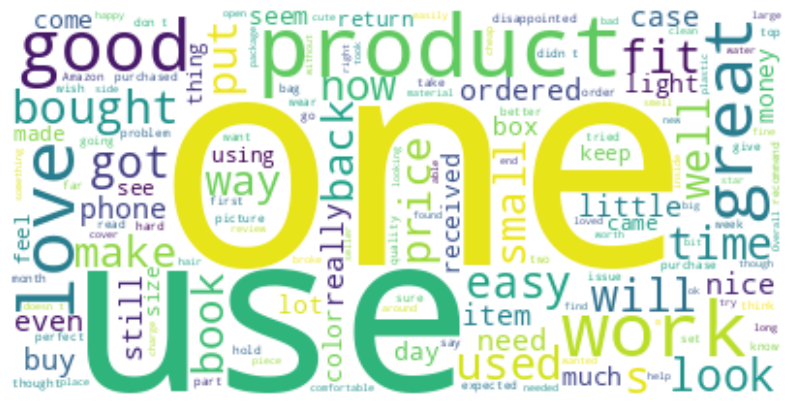

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Concatenating all the text from the 'Review' column into a single string
text = " ".join(review for review in df['review_body'])

# Defining a set of stopwords
stopwords = set(STOPWORDS)

# Create a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Setting up the figure size
plt.figure(figsize=(10, 10))

# Displaying the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

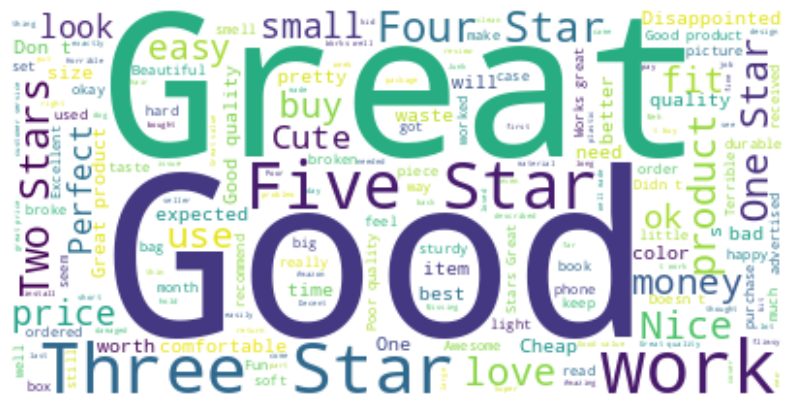

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Concatenating all the text from the 'Review' column into a single string
text = " ".join(review for review in df['review_title'])

# Defining a set of stopwords
stopwords = set(STOPWORDS)

# Creating a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Setting up the figure size
plt.figure(figsize=(10, 10))

# Displaying the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
## to get the corpus containing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<BarContainer object of 10 artists>

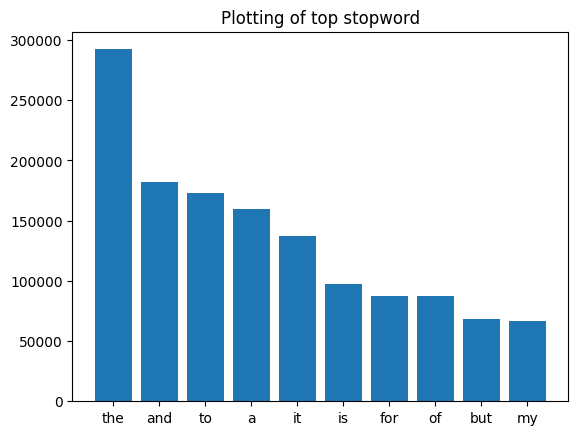

In [ ]:
## creating corpus
corpus=[]
review_word = df['review_body'].str.split()
review_word=review_word.values.tolist()
corpus=[word for i in review_word for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1


top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
plt.title('Plotting of top stopword')
plt.bar(x,y)

## Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
import string
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('[^a-zA-Z0-9]', ' ', text)  # Remove non-alphanumeric characters
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub('\+', '', text)  # Remove plus symbols
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove newline characters
    text = re.sub('\s+', ' ', text).strip()  # Remove extra whitespace
    text = ' '.join([word for word in text.split(' ') if word not in stopword])  # Remove stopwords
    text = ' '.join([stemmer.stem(word) for word in text.split(' ')])  # Stem words
    return text

# Apply the cleaning function to the "review_body" column in the df DataFrame
df["cleaned_review_body"] = df["review_body"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(10)

,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,cleaned_review_body
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative,tri stand ceram counter lost suction within minut
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive,receiv order quick good deal order alway glad ...
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive,littl disappoint bright tini
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive,good product look good wall
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative,chain within two week worn rub metal shave dog...
5,en_0227630,product_en_0381391,reviewer_en_0499451,1,"Never could get it to work. Not only that, it ...",Absolutely NOT,toy,Negative,never could get work float side extrem poor qu...
6,en_0770135,product_en_0186651,reviewer_en_0560478,5,Fun tassels and great quality,Fun,home,Positive,fun tassel great qualiti
7,en_0115228,product_en_0056478,reviewer_en_0785008,4,"Very lightweight, and shuts off instantly if i...",Efficient little heater,home,Positive,lightweight shut instant sens movement pick kn...
8,en_0522350,product_en_0953422,reviewer_en_0130883,4,Just what I needed. Expandable and fairly well...,Four Stars,electronics,Positive,need expand fair well made
9,en_0325410,product_en_0998839,reviewer_en_0300412,1,"One in three work at all, sadly it was the fir...",1 in 3 work - AVOID THIS!,industrial_supplies,Negative,one three work sad first one took us almost mo...


visualizing preprocessed review:

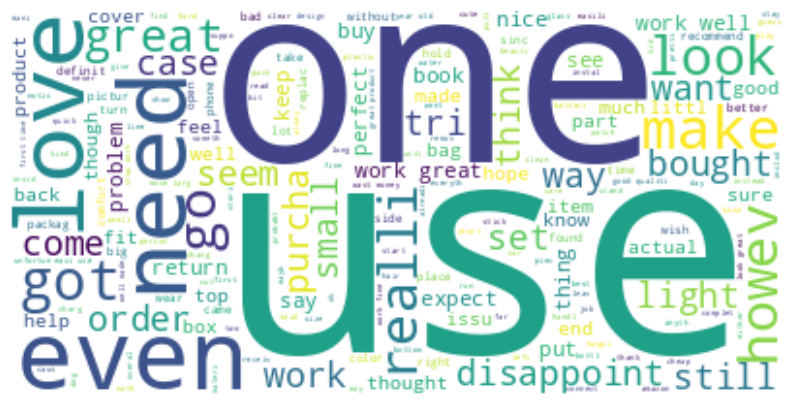

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Concatenating all the text from the 'Review' column into a single string
text = " ".join(review for review in df['cleaned_review_body'])

# Defining a set of stopwords
stopwords = set(STOPWORDS)

# Creating a WordCloud object
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Setting up the figure size
plt.figure(figsize=(10, 10))

# Displaying the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment Label' to get encoded labels
df['Encoded Label'] = label_encoder.fit_transform(df['Sentiment Label'])

# Print the mapping of original labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original labels to encoded values:")
print(label_mapping)

# Display the updated DataFrame with the 'Encoded Label' column
print("Updated DataFrame:")
df.head()

Mapping of original labels to encoded values:
{'Negative': 0, 'Positive': 1}
Updated DataFrame:


,review_id,product_id,reviewer_id,stars,review_body,review_title,product_category,Sentiment Label,cleaned_review_body,Encoded Label
0,en_0944516,product_en_0771017,reviewer_en_0516437,2,Tried to stand it on my ceramic counter - but ...,Doesn't hold,beauty,Negative,tri stand ceram counter lost suction within minut,0
1,en_0365489,product_en_0303438,reviewer_en_0993746,5,Received my order quickly! Good deal on this o...,Good deal on this order,drugstore,Positive,receiv order quick good deal order alway glad ...,1
2,en_0953574,product_en_0119948,reviewer_en_0766383,3,A little disappointing. Not very bright and th...,Not very bright.,home_improvement,Positive,littl disappoint bright tini,1
3,en_0571603,product_en_0683693,reviewer_en_0074314,4,Good product and looks good on the wall.,Great space saver,office_product,Positive,good product look good wall,1
4,en_0335241,product_en_0296351,reviewer_en_0740514,2,The chain within two weeks was worn off and ru...,Disatisfied With Product,pet_products,Negative,chain within two week worn rub metal shave dog...,0


## Vectorization- For conversion of Text to Numerical Feature

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Apply TF-IDF vectorization to the 'cleaned_review_body' column
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_review_body'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

'''
# Concatenate the TF-IDF features with the original DataFrame
df = pd.concat([df, tfidf_df], axis=1)
'''

'\n# Concatenate the TF-IDF features with the original DataFrame\ndf = pd.concat([df, tfidf_df], axis=1)\n'

In [ ]:
tfidf_df.head()

,10,100,12,15,20,2nd,30,50,abl,absolut,...,write,written,wrong,xl,year,yellow,yes,yet,zero,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Find the top TF-IDF terms for the sixth review
top_tfidf_terms = tfidf_df.iloc[5].sort_values(ascending=False).head(10)
print(df['cleaned_review_body'][5])
print(top_tfidf_terms)

never could get work float side extrem poor qualiti
extrem      0.459002
poor        0.420025
side        0.386558
never       0.365381
could       0.344387
qualiti     0.299285
get         0.264084
work        0.228149
previous    0.000000
price       0.000000
Name: 5, dtype: float64


In [ ]:
# Find the terms with the highest average TF-IDF scores
average_tfidf = tfidf_df.mean()
top_avg_tfidf_terms = average_tfidf.sort_values(ascending=False).head(10)
print(top_avg_tfidf_terms)

work       0.034364
use        0.029553
great      0.028209
like       0.027595
good       0.026712
product    0.024643
one        0.023928
love       0.022565
look       0.020570
would      0.019053
dtype: float64


## Feature Engineering

In [ ]:
# Features (TF-IDF)
X = tfidf_features

# Target (Encoded Sentiment Label)
y = df['Encoded Label']

Dataset train-test Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)

# Fit the model
log_reg_model.fit(X_train, y_train)

# Predict using the test set
y_pred = log_reg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.78705


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_model = MultinomialNB()

# Train the Naive Bayes model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7609


## RNN - LSTM